# Section 0 问题描述与完成项目流程

## 1. 问题描述


<img src="default.png" width="20%"></img>

在该项目中，你将使用强化学习算法，实现一个自动走迷宫机器人。

1. 如上图所示，智能机器人显示在右上角。在我们的迷宫中，有陷阱（红色炸弹）及终点（蓝色的目标点）两种情景。机器人要尽量避开陷阱、尽快到达目的地。
2. 小车可执行的动作包括：向上走 `u`、向右走 `r`、向下走 `d`、向左走 `l`。
3. 执行不同的动作后，根据不同的情况会获得不同的奖励，具体而言，有以下几种情况。
    - 撞到墙壁：-10
    - 走到终点：50
    - 走到陷阱：-30
    - 其余情况：-0.1
4. 我们需要通过修改 `robot.py` 中的代码，来实现一个 Q Learning 机器人，实现上述的目标。

## 2. 完成项目流程

1. 配置环境，使用 `envirnment.yml` 文件配置名为 `robot-env` 的 conda 环境，具体而言，你只需转到当前的目录，在命令行/终端中运行如下代码，稍作等待即可。
```
conda env create -f envirnment.yml
```
安装完毕后，在命令行/终端中运行 `source activate robot-env`（Mac/Linux 系统）或 `activate robot-env`（Windows 系统）激活该环境。

2. 阅读 `main.ipynb` 中的指导完成项目，并根据指导修改对应的代码，生成、观察结果。
3. 导出代码与报告，上传文件，提交审阅并优化。
---

---

# Section 1 算法理解


## 1. 1 强化学习总览

强化学习作为机器学习算法的一种，其模式也是让智能体在“训练”中学到“经验”，以实现给定的任务。但不同于监督学习与非监督学习，在强化学习的框架中，我们更侧重通过智能体与环境的**交互**来学习。通常在监督学习和非监督学习任务中，智能体往往需要通过给定的训练集，辅之以既定的训练目标（如最小化损失函数），通过给定的学习算法来实现这一目标。然而在强化学习中，智能体则是通过其与环境交互得到的奖励进行学习。这个环境可以是虚拟的（如虚拟的迷宫），也可以是真实的（自动驾驶汽车在真实道路上收集数据）。


在强化学习中有五个核心组成部分，它们分别是：**环境（Environment）**、**智能体（Agent）**、**状态（State）**、**动作（Action）**和**奖励（Reward）**。在某一时间节点 $t$：
    
- 智能体在从环境中感知其所处的状态 $s_t$
- 智能体根据某些准则选择动作 $a_t$
- 环境根据智能体选择的动作，向智能体反馈奖励 $r_{t+1}$

通过合理的学习算法，智能体将在这样的问题设置下，成功学到一个在状态 $s_t$ 选择动作 $a_t$ 的策略 $\pi (s_t) = a_t$。

---

**问题 1**：请参照如上的定义，描述出 “机器人走迷宫这个问题” 中强化学习五个组成部分对应的实际对象：

- **环境** : 迷宫的实现环境，迷宫的陷阱，墙面，可以行走的地方和终点。
- **状态** : 智能体在迷宫中，在当前所处的位置比如(0,1)，可以根据状态来决定之后到达目标的动作选择。


- **动作** : 机器人上下左右的移动
- **奖励** : 撞到墙壁：-10 走到终点：50 走到陷阱：-30 其余情况：-0.1

$$T(s^{'}, a, s) = P(s^{'}|a,s)$$


---

## 1.2 计算 Q 值 

在我们的项目中，我们要实现基于 Q-Learning 的强化学习算法。Q-Learning 是一个值迭代（Value Iteration）算法。与策略迭代（Policy Iteration）算法不同，值迭代算法会计算每个”状态“或是”状态-动作“的值（Value）或是效用（Utility），然后在执行动作的时候，会设法最大化这个值。因此，对每个状态值的准确估计，是我们值迭代算法的核心。通常我们会考虑**最大化动作的长期奖励**，即不仅考虑当前动作带来的奖励，还会考虑动作长远的奖励。

在 Q-Learning 算法中，我们把这个长期奖励记为 Q 值，我们会考虑每个 ”状态-动作“ 的 Q 值，具体而言，它的计算公式为：

$$
q(s_{t},a) = R_{t+1} + \gamma \times\max_a q(a,s_{t+1})
$$

也就是对于当前的“状态-动作” $(s_{t},a)$，我们考虑执行动作 $a$ 后环境给我们的奖励 $R_{t+1}$，以及执行动作 $a$ 到达 $s_{t+1}$后，执行任意动作能够获得的最大的Q值 $\max_a q(a,s_{t+1})$，$\gamma$ 为折扣因子。

不过一般地，我们使用更为保守地更新 Q 表的方法，即引入松弛变量 $alpha$，按如下的公式进行更新，使得 Q 表的迭代变化更为平缓。

$$
q(s_{t},a) = (1-\alpha) \times q(s_{t},a) + \alpha \times(R_{t+1} + \gamma \times\max_a q(a,s_{t+1}))
$$



---
<img src="default2.png" width="20%"></img>

**问题 2**：根据已知条件求 $q(s_{t},a)$，在如下模板代码中的空格填入对应的数字即可。


已知：如上图，机器人位于 $s_1$，行动为 `u`，行动获得的奖励与题目的默认设置相同。在 $s_2$ 中执行各动作的 Q 值为：`u`: -24，`r`: -13，`d`: -0.29、`l`: +40，$\gamma$ 取0.9。


$$
\begin{align}
q(s_{t},a) & = R_{t+1} + \gamma \times\max_a q(a,s_{t+1}) \\
 & =(-0.1) + (0.9)*(40) \\
 & =(35.9)
\end{align}
$$


---

### 解释
1. $R_{t+1}$是小车在S1执行动作u之后得到的奖励，不是下S2执行动作R得到的奖励。
2. 这里的下标为t+1的含义是，在t的时刻执行动作a，则会在第t+1时刻得到对应的奖励 $R_{t+1}$。这里是 小车在 S1 执行了动作u之后，因为没有撞到墙壁，所以获得-0.1的奖励，见报告中，Section0的第一节的第三点。
3. 相应地，$\smash{\displaystyle\max_{a}} q(a,s_{t+1})$ 代表着，在 t+1 时刻，在状态 $s_{t+1}$ 下， 对所有的动作而言，小车 q 值能够取得的最大值，也就是我们在S2下的最大的Q值。

## 1.3 如何选择动作

在强化学习中，「探索-利用」问题是非常重要的问题。具体来说，根据上面的定义，我们会尽可能地让机器人在每次选择最优的决策，来最大化长期奖励。但是这样做有如下的弊端：
1. 在初步的学习中，我们的 Q 值会不准确，如果在这个时候都按照 Q 值来选择，那么会造成错误。
2. 学习一段时间后，机器人的路线会相对固定，则机器人无法对环境进行有效的探索。

因此我们需要一种办法，来解决如上的问题，增加机器人的探索。由此我们考虑使用 epsilon-greedy 算法，即在小车选择动作的时候，以一部分的概率随机选择动作，以一部分的概率按照最优的 Q 值选择动作。同时，这个选择随机动作的概率应当随着训练的过程逐步减小。

---

**问题 3**：在如下的代码块中，实现 epsilon-greedy 算法的逻辑，并运行测试代码。

In [1]:
import random
import numpy as np
actions = ['u','r','d','l']
qline = {'u':1.2, 'r':-2.1, 'd':-24.5, 'l':27}
epsilon = 0.3 # 以0.3的概率进行随机选择\
randomValue = None
def choose_action(epsilon):
    action = None
    # 以概率epsilon执行
    randomValue = random.uniform(0,1)
    print("randomValue:", randomValue)
    if randomValue <= epsilon:
        # 随机选择动作
        action = random.choice(actions) 
    # 否则选择具有最大 Q 值的动作
    else: 
        action = max(qline, key=qline.get)
    return action
choose_action(epsilon)

randomValue: 0.40749798747230626


'l'

---

---

# Section 2 代码实现

## 2.1. `Maze` 类理解

我们首先引入了迷宫类 `Maze`，这是一个非常强大的函数，它能够根据你的要求随机创建一个迷宫，或者根据指定的文件，读入一个迷宫地图信息。

1. 使用 `Maze("file_name")` 根据指定文件创建迷宫，或者使用 `Maze(maze_size=(height,width))` 来随机生成一个迷宫。
2. 使用 `trap_number` 参数，在创建迷宫的时候，设定迷宫中陷阱的数量。
3. 直接键入迷宫变量的名字按回车，展示迷宫图像（如 `g=Maze("xx.txt")`，那么直接输入 `g` 即可。
4. 建议生成的迷宫尺寸，长在 6~12 之间，宽在 10～12 之间。

---

**问题 4**：在如下的代码块中，创建你的迷宫并展示。

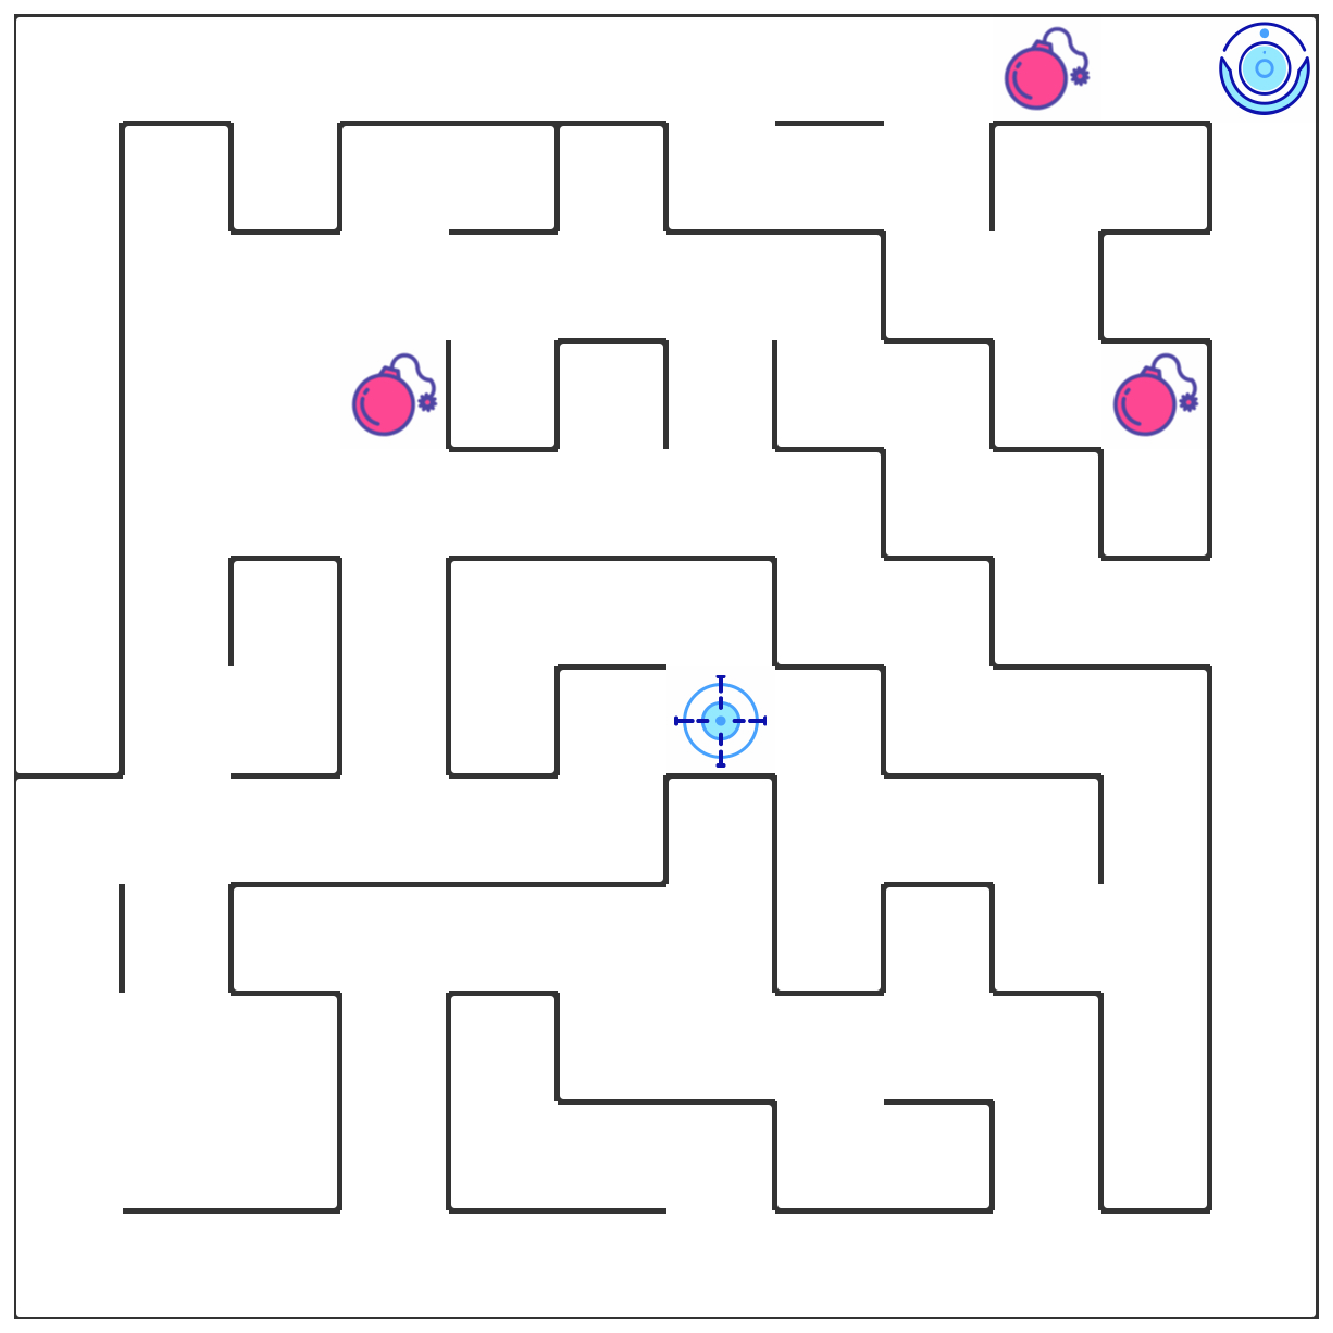

Maze of size (12, 12)

In [2]:
from Maze import Maze
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
## todo: 创建迷宫并展示
g = Maze(maze_size=(12,12),trap_number=3)
g

### 优化
可以尝试使用 test_world 目录下的迷宫，如 test_world/maze_01.txt，或者修改 Maze 类中 ***__generate_maze*** 函数中的 ***complexity*** 及 ***density*** 变量，来增加迷宫的难度.

***def __generate_maze(self, height=21, width=27, complexity=.25, density=.25):***

---

你可能已经注意到，在迷宫中我们已经默认放置了一个机器人。实际上，我们为迷宫配置了相应的 API，来帮助机器人的移动与感知。其中你随后会使用的两个 API 为 `maze.sense_robot()` 及 `maze.move_robot()`。

1. `maze.sense_robot()` 为一个无参数的函数，输出机器人在迷宫中目前的位置。
2. `maze.move_robot(direction)` 对输入的移动方向，移动机器人，并返回对应动作的奖励值。

---

**问题 5**：随机移动机器人，并记录下获得的奖励，展示出机器人最后的位置。

(0, 9)
[-10.0, -0.1, -10.0, -30.0, -10.0, -10.0, -0.1, -30.0, -10.0, -10.0]


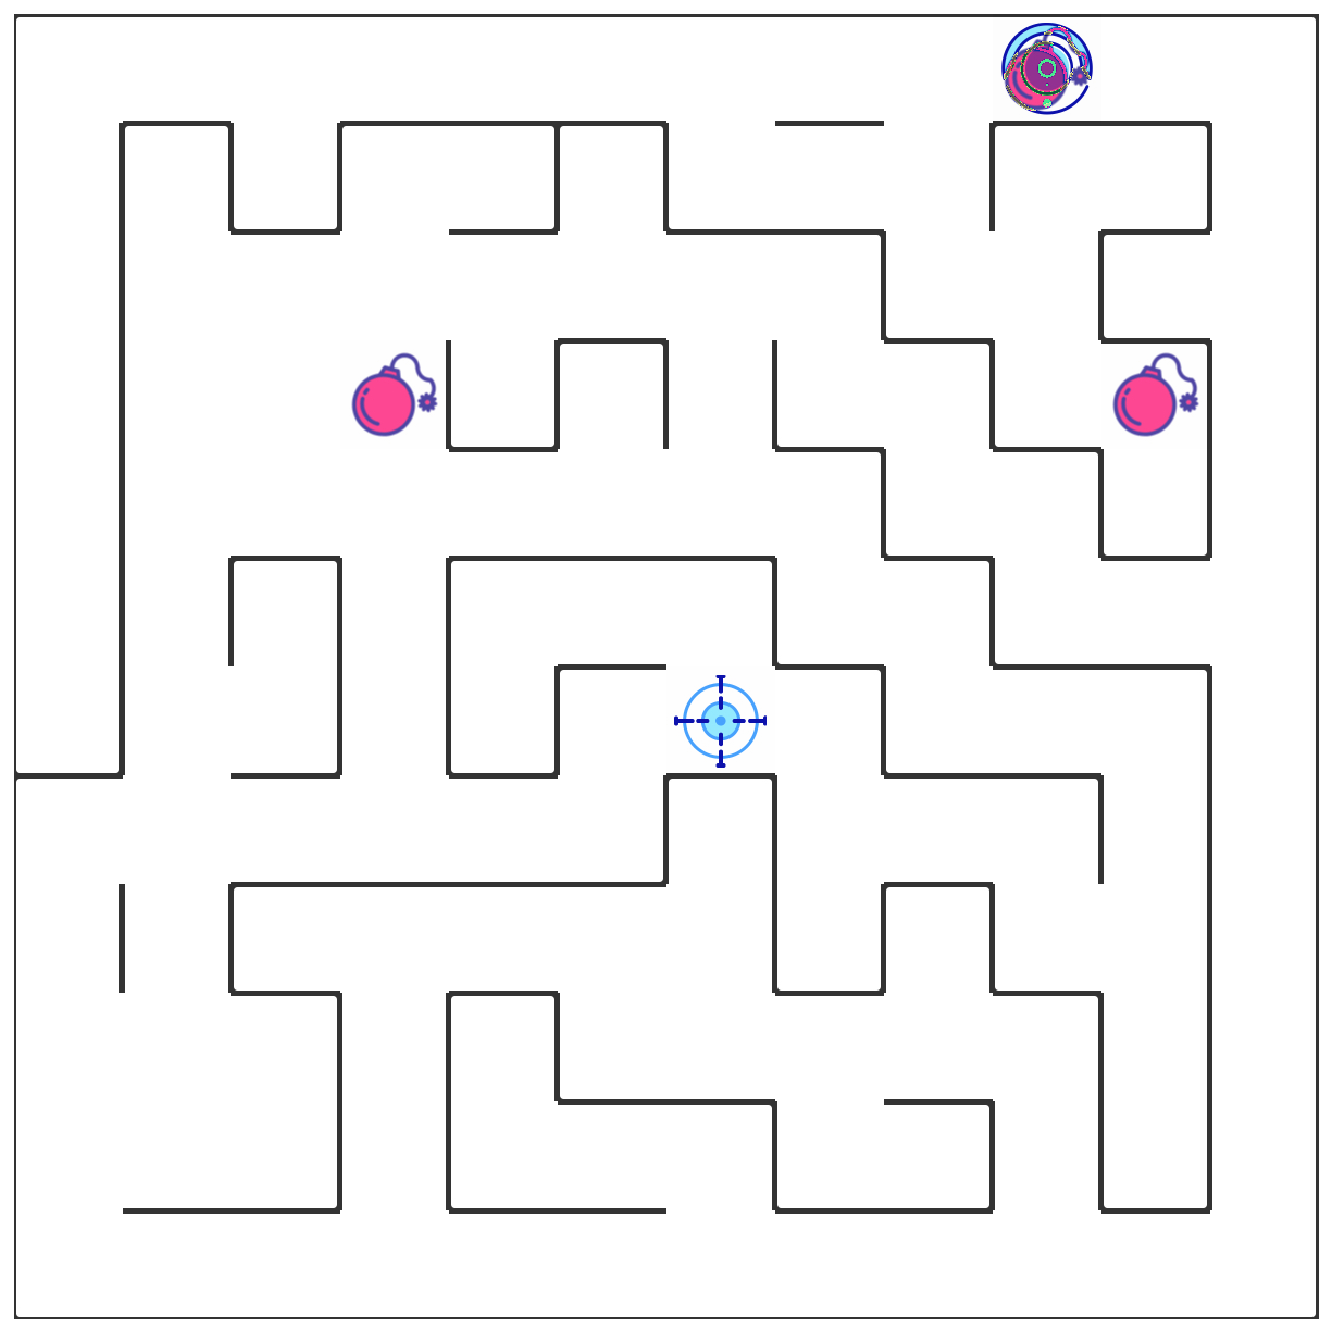

Maze of size (12, 12)

In [3]:
rewards = []
## 循环、随机移动机器人10次，记录下奖励
for i in range(10):
    rewards.append(g.move_robot(np.random.choice(actions))) 
## 输出机器人最后的位置
print(g.sense_robot())
print(rewards)
## 打印迷宫，观察机器人位置
g

## 2.2. `Robot` 类实现

`Robot` 类是我们需要重点实现的部分。在这个类中，我们需要实现诸多功能，以使得我们成功实现一个强化学习智能体。总体来说，之前我们是人为地在环境中移动了机器人，但是现在通过实现 `Robot` 这个类，机器人将会自己移动。通过实现学习函数，`Robot` 类将会学习到如何选择最优的动作，并且更新强化学习中对应的参数。

首先 `Robot` 有多个输入，其中 `alpha=0.5, gamma=0.9, epsilon0=0.5` 表征强化学习相关的各个参数的默认值，这些在之前你已经了解到，`Maze` 应为机器人所在迷宫对象。

随后观察 `Robot.update` 函数，它指明了在每次执行动作时，`Robot` 需要执行的程序。按照这些程序，各个函数的功能也就明了了。

最后你需要实现 `Robot.py` 代码中的8段代码，他们都在代码中以 `#TODO` 进行标注，你能轻松地找到他们。

---

**问题 6**：实现 `Robot.py` 中的8段代码，并运行如下代码检查效果（记得将 `maze` 变量修改为你创建迷宫的变量名）。



('u', -10.0)


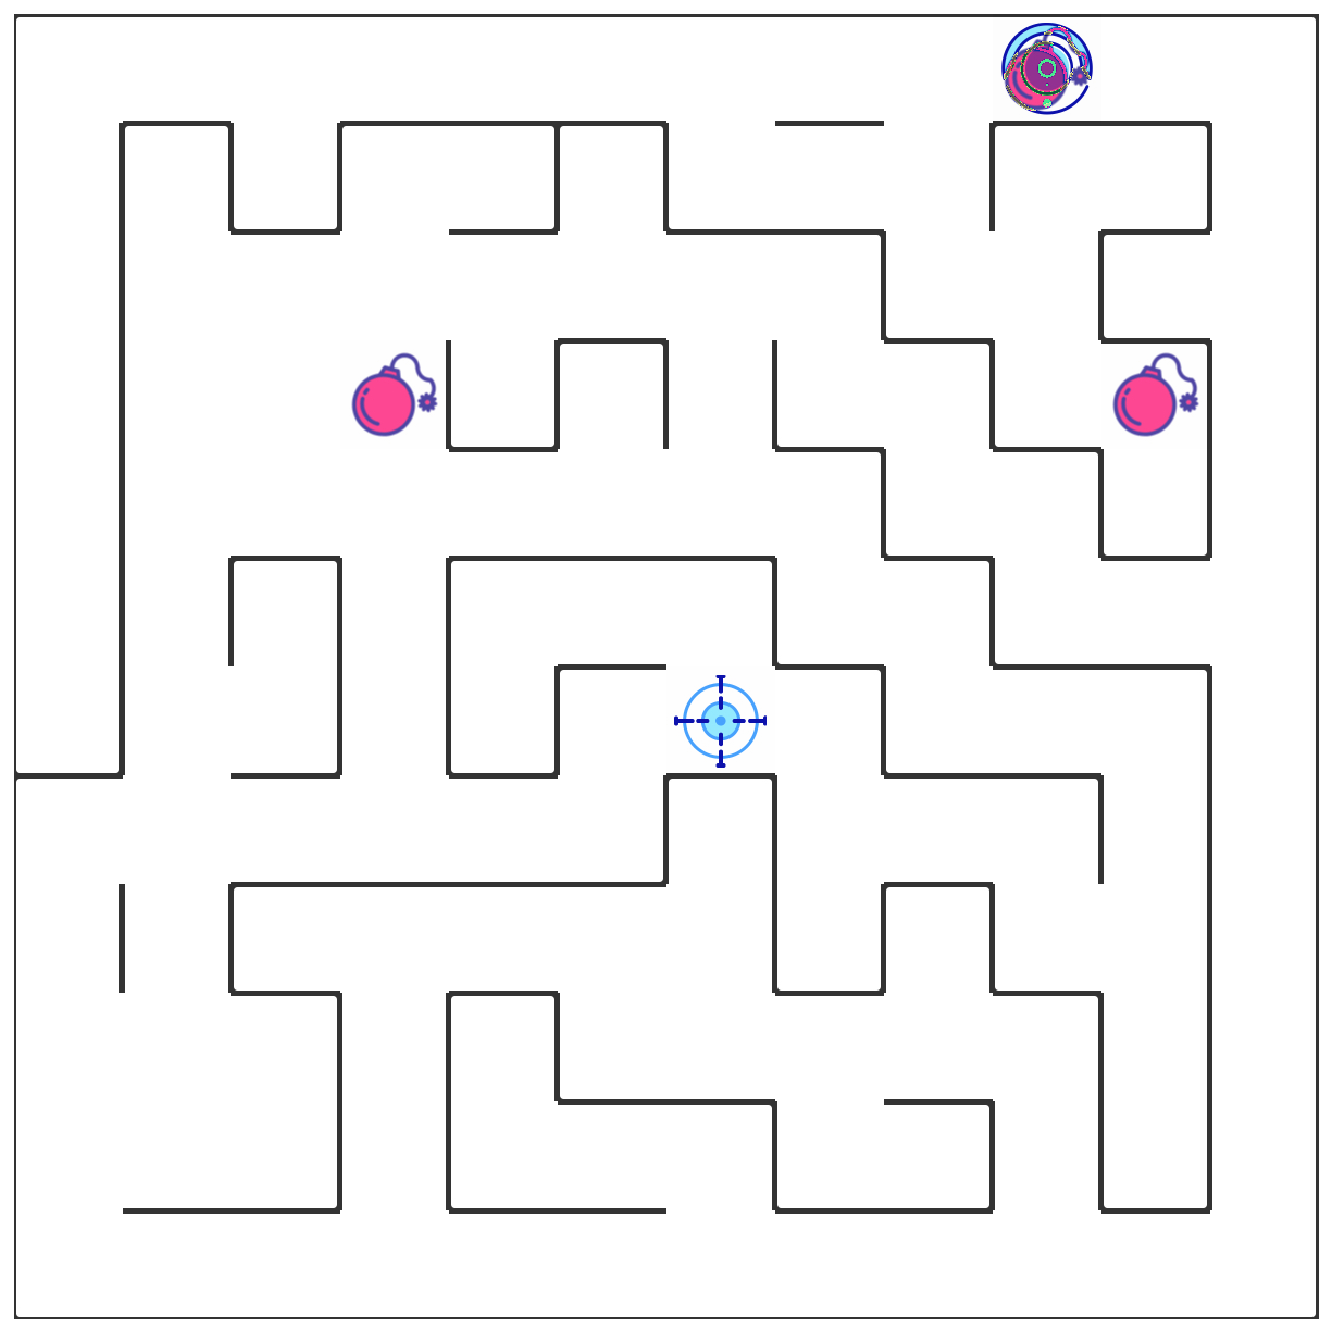

Maze of size (12, 12)

In [4]:
from Robot import Robot
robot = Robot(g) # 记得将 maze 变量修改为你创建迷宫的变量名
robot.set_status(learning=True,testing=False)
print(robot.update())
g

### 知识点
1. 在如下所示 Q-learning 更新公式中，γ*maxQ 的一项目就考虑了所谓的「未来奖励」——这是强化学习中的一个巨大亮点。
<img src="qtable_formula.svg" width="80%"></img>
2. 也就是说，我们在计算、衡量一个动作的时候，不仅考虑它当前一步获得的奖励 r，还要考虑它执行这个动作之后带来的累计奖励——这能够帮助我们更好地衡量一个动作的好坏。
3. 其中 γ 是折扣因子，具体解释见下方参数解释。而 maxQ 是表示，对下一个状态中，获取所有 action 中最大的Q值，来近似未来奖励。


## 2.3 用 `Runner` 类训练 Robot

在实现了上述内容之后，我们就可以开始对我们 `Robot` 进行训练并调参了。我们为你准备了又一个非常棒的类 `Runner`，来实现整个训练过程及可视化。使用如下的代码，你可以成功对机器人进行训练。并且你会在当前文件夹中生成一个名为 `filename` 的视频，记录了整个训练的过程。通过观察该视频，你能够发现训练过程中的问题，并且优化你的代码及参数。

---

**问题 7**：尝试利用下列代码训练机器人，并进行调参。可选的参数包括：

- 训练参数
    - 训练次数 `epoch`
- 机器人参数：
    - `epsilon0` (epsilon 初值)
    - `epsilon`衰减（可以是线性、指数衰减，可以调整衰减的速度），你需要在 Robot.py 中调整
    - `alpha`
    - `gamma`
- 迷宫参数:
    - 迷宫大小
    - 迷宫中陷阱的数量

In [14]:
## 可选的参数：
epoch = 80
epsilon0 = 1
alpha = 0.5
gamma = 0.9
maze_size = (10,10)
trap_number = 4

In [15]:
from Runner import Runner

g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner(r, g)
runner.run_training(epoch, display_direction=True)
#runner.generate_movie(filename = "final1.mp4") # 你可以注释该行代码，加快运行速度，不过你就无法观察到视频了。

### epsilon greedy 算法的解释 /1/
1. 我们的小车一开始接触到的 state 很少，并且如果小车按照已经学到的 qtable 执行，那么小车很有可能出错或者绕圈圈。同时我们希望小车一开始能随机的走一走，接触到更多的 state。
2. 基于上述原因，我们希望小车在一开始的时候不完全按照 Q learning 的结果运行，即以一定的概率 epsilon，随机选择 action，而不是根据 maxQ 来选择 action。然后随着不断的学习，那么我会降低这个随机的概率，使用一个衰减函数来降低 epsilon。
3. 这个就解决了所谓的 exploration and exploitation 的问题，在“探索”和“执行”之间寻找一个权衡。

REF
/1/ http://discussions.youdaxue.com/t/topic/33333

### alpha 的解释
1. alpha 是一个权衡上一次学到结果和这一次学习结果的量，如：$$Q = (1-alpha)*Q_{old} + alpha*Q_{current}$$
2. alpha 设置过低会导致机器人只在乎之前的知识，而不能积累新的 reward。一般取 0.5 来均衡以前知识及新的 reward。

### gamma 的解释
1. gamma 是考虑未来奖励的因子，是一个(0,1)之间的值。一般我们取0.9，能够充分地对未来奖励（也就是执行了这一步动作之后，在对应的下一状态下，执行动作会带来什么奖励）进行考虑。
2. 实际上如果你将它调小了，你会发现终点处的正奖励不能够“扩散”到周围，也就是说，机器人很有可能无法学习到一个到达终点的策略。

---

使用 `runner.plot_results()` 函数，能够打印机器人在训练过程中的一些参数信息。

- Success Times 代表机器人在训练过程中成功的累计次数，这应当是一个累积递增的图像。
- Accumulated Rewards 代表机器人在每次训练 epoch 中，获得的累积奖励的值，这应当是一个逐步递增的图像。
- Running Times per Epoch 代表在每次训练 epoch 中，小车训练的次数（到达终点就会停止该 epoch 转入下次训练），这应当是一个逐步递减的图像。

---

**问题 8**：使用 `runner.plot_results()` 输出训练结果，根据该结果对你的机器人进行分析。

- 指出你选用的参数如何，选用参数的原因。
- 建议你比较不同参数下机器人的训练的情况。
- 训练的结果是否满意，有何改进的计划。

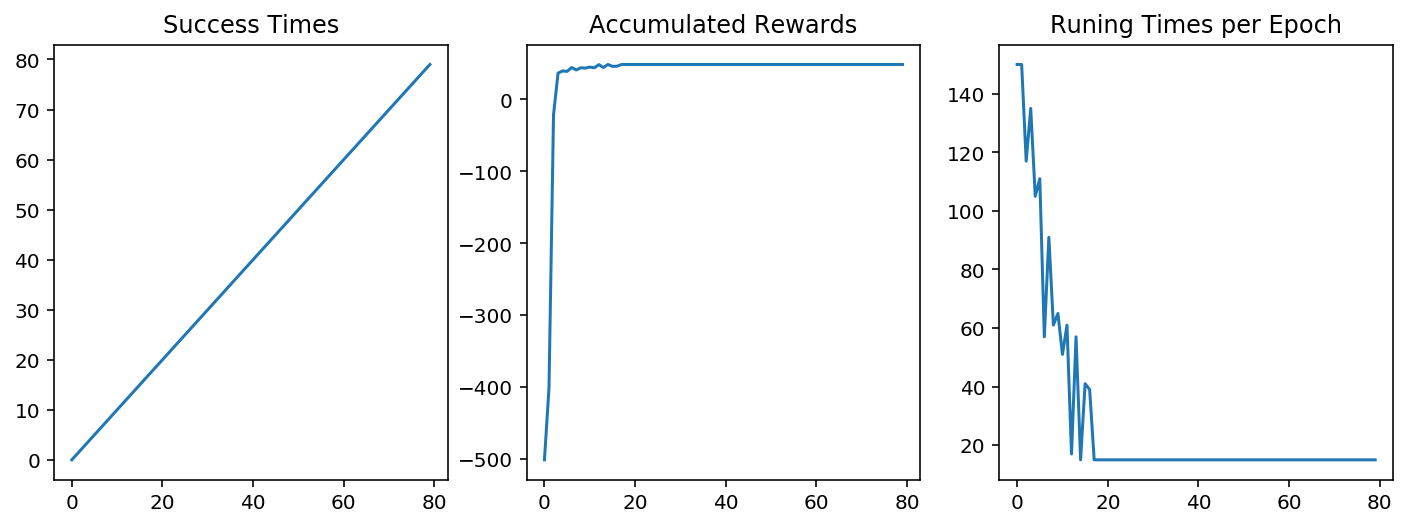

In [16]:
## 可选的参数测试1：
epoch = 80
epsilon0 = 1
alpha = 0.5
gamma = 0.9
maze_size = (10,10)
trap_number = 8
#g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner(r, g)
runner.run_training(epoch, display_direction=True)
runner.plot_results()

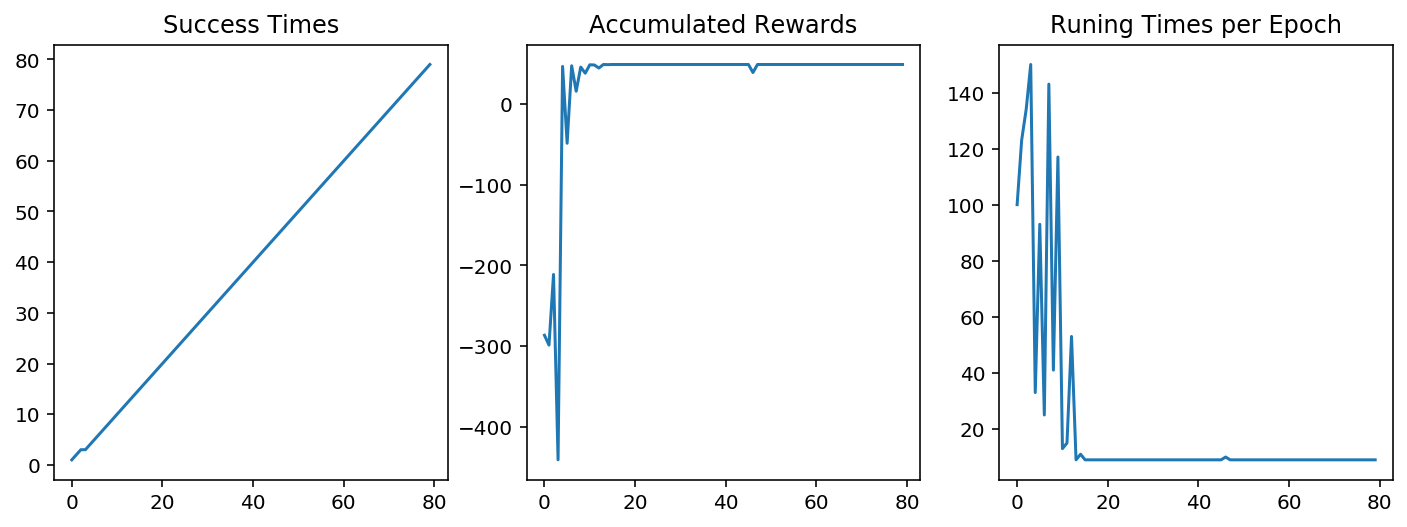

In [8]:
## 可选的参数测试2：
epoch = 80
epsilon0 = 0
alpha = 0.5
gamma = 0.9
maze_size = (10,10)
trap_number = 8
#g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner(r, g)
runner.run_training(epoch, display_direction=True)
runner.plot_results()

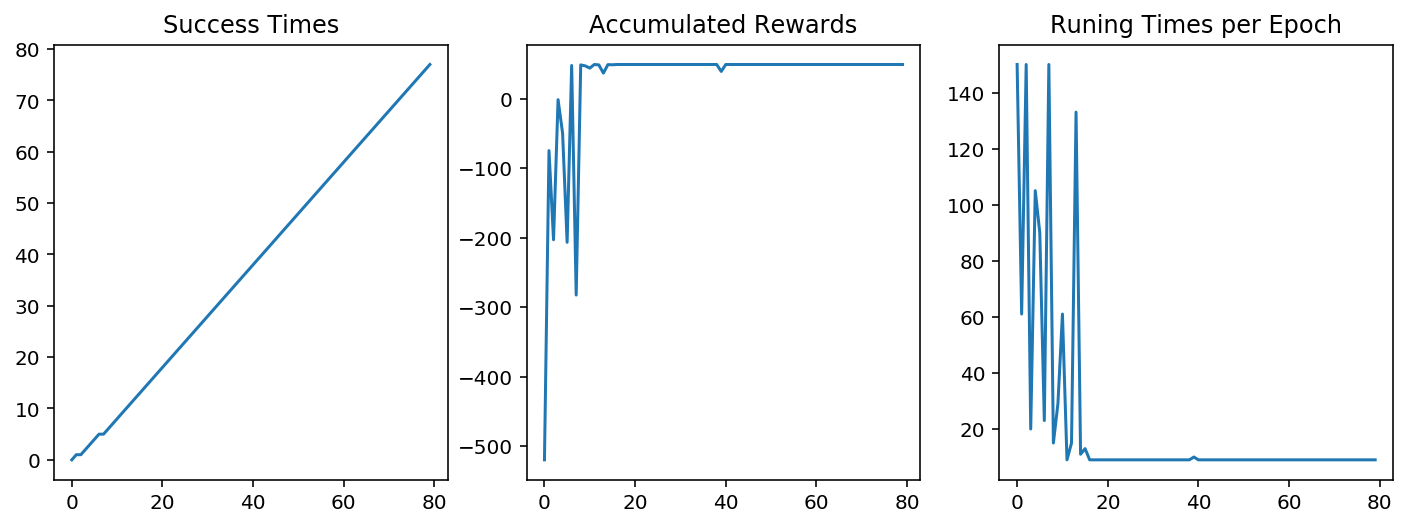

In [9]:
## 可选的参数测试3：
epoch = 80
epsilon0 = 0.5
alpha = 0.5
gamma = 0.9
maze_size = (10,10)
trap_number = 8
#g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner(r, g)
runner.run_training(epoch, display_direction=True)
runner.plot_results()

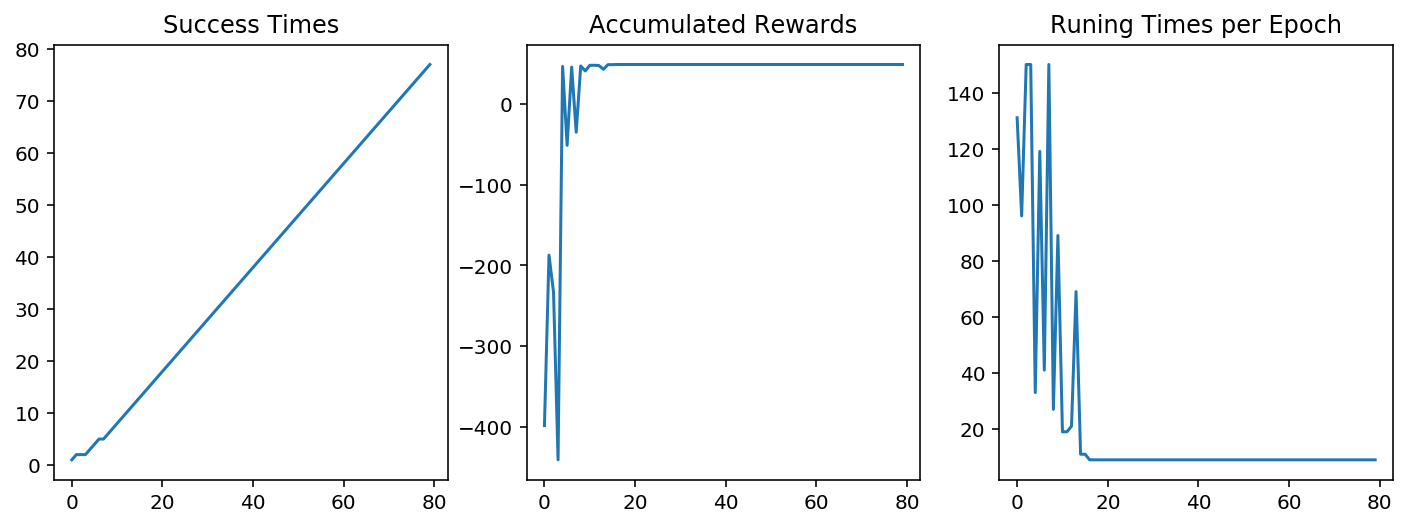

In [10]:
## 可选的参数测试4：
epoch = 80
epsilon0 = 0.5
alpha = 0.5
gamma = 0.3
maze_size = (10,10)
trap_number = 8
#g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner(r, g)
runner.run_training(epoch, display_direction=True)
runner.plot_results()

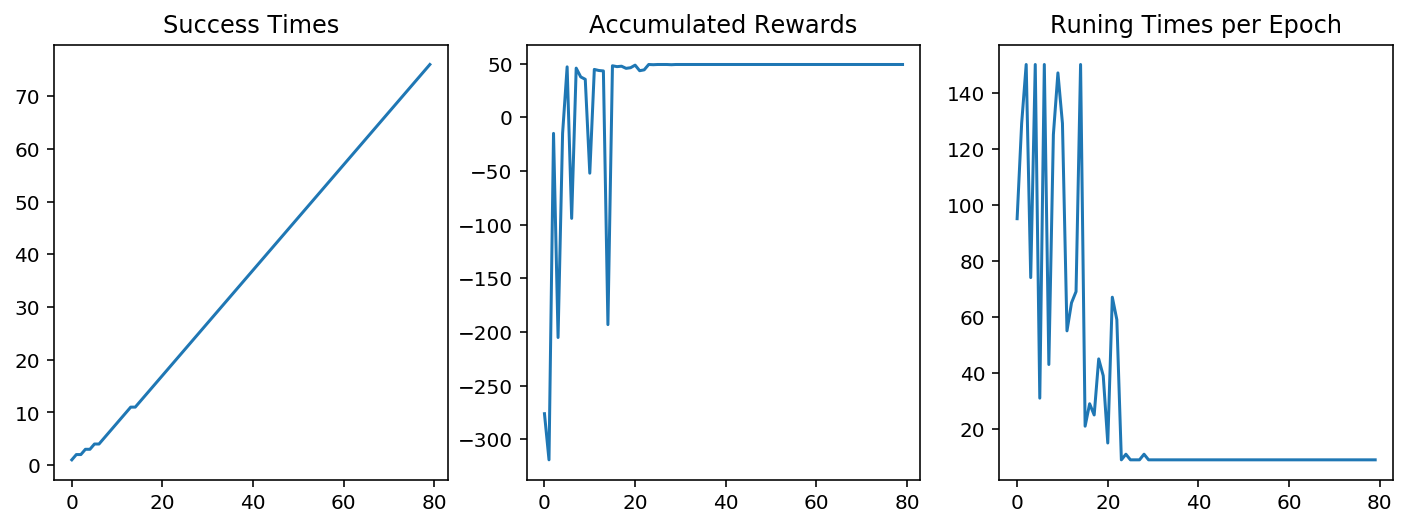

In [11]:
## 可选的参数测试5：
epoch = 80
epsilon0 = 0.5
alpha = 0.5
gamma = 0.01
maze_size = (10,10)
trap_number = 8
#g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner(r, g)
runner.run_training(epoch, display_direction=True)
runner.plot_results()

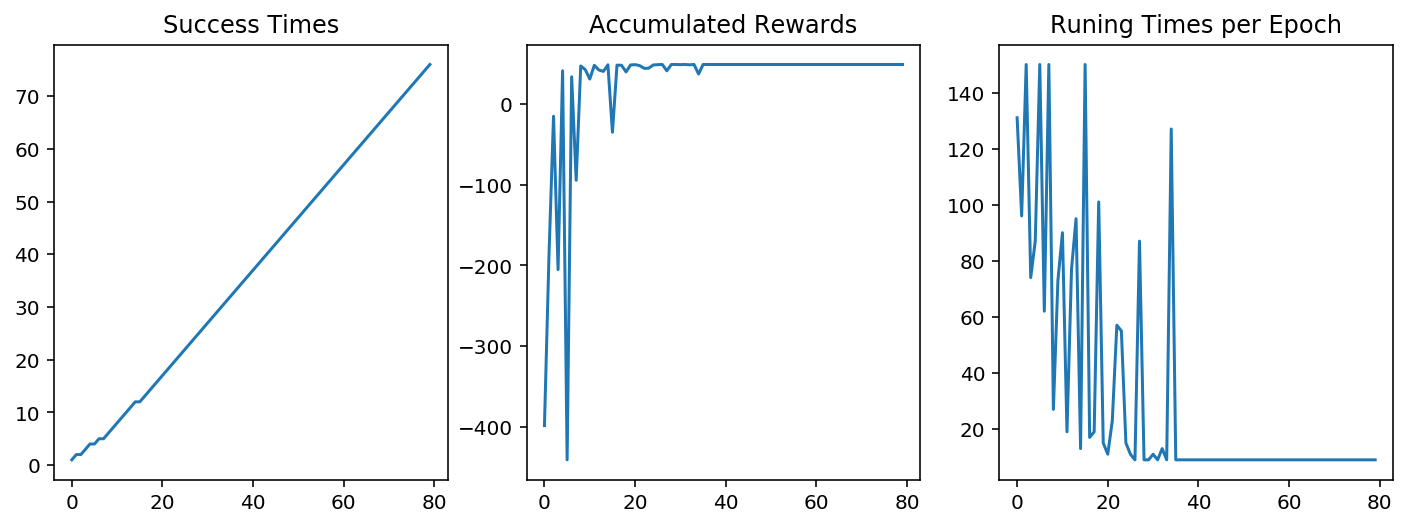

In [12]:
## 可选的参数测试6：
epoch = 80
epsilon0 = 0.5
alpha = 0.1
gamma = 0.9
maze_size = (10,10)
trap_number = 8
#g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner(r, g)
runner.run_training(epoch, display_direction=True)
runner.plot_results()

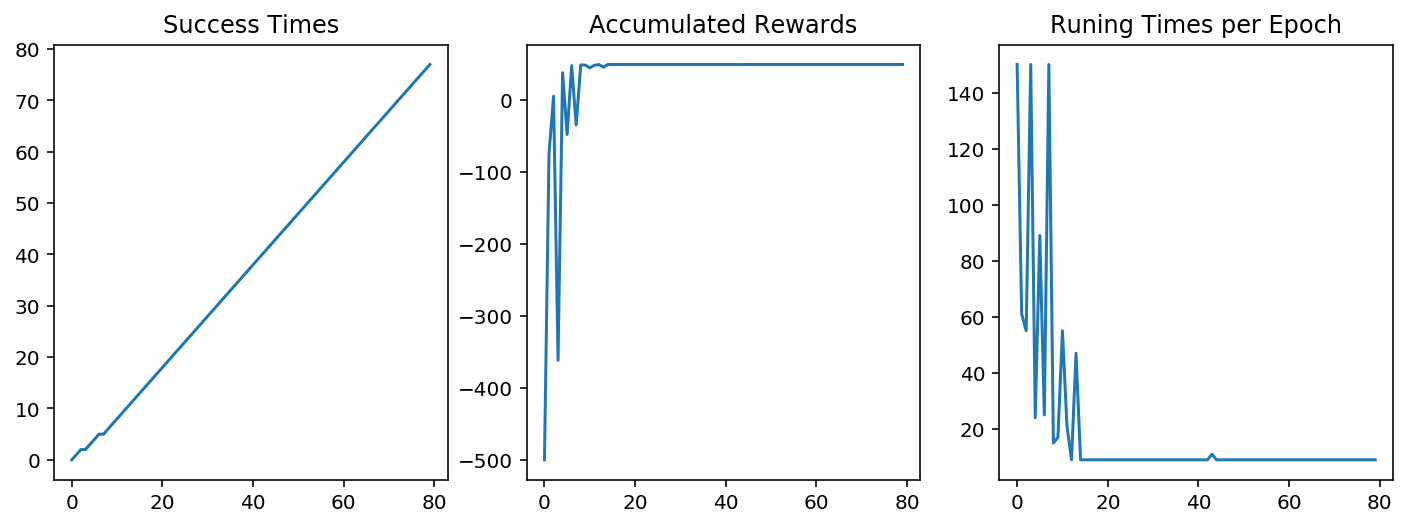

In [13]:
## 可选的参数测试7：
epoch = 80
epsilon0 = 0.5
alpha = 0.9
gamma = 0.1
maze_size = (10,10)
trap_number = 8
#g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner(r, g)
runner.run_training(epoch, display_direction=True)
runner.plot_results()

(回答区)
1. 调整epsilon(测试1，2，3). 项目采用了epsilon-greedy策略，初期会根据epsilon概率随机选择动作，从而尽量地去探索环境，随着时间的推移，逐渐降低epsilon概率。epsilon函数采用1/t，t为时间步数，从1开始。随着时间的增长，epsilon概率逐渐趋近于0.由于代码设计的原因，epsilon的初始值在我的项目中没有太大的作用，因为在初始化的时候会被直成0，然后随着时间进入1/t函数。测试1-3的结果基本保持一致。
2. 调整gamma(测试1，4，5). gamma的值代表了未来奖励的权重，它的值越大表示对未来(奖励)的考虑的越多。当gamma很小时，Agent则不能在短时间内学到最优路径，如测试5的结果，它花费了更多的时间和Epoch来学到最优路径。
3. 调整alpha(测试1，6，7). alpha参数决定了上轮学习结果和本轮学习结果的权重。如果这个值偏小(测试6)，则Agent的选择则会非常的保守，趋于保持现状，这会导致花费更多的时间和Epoch来学到最优路径。
综上，我选择epoch = 80，epsilon0 = 1，alpha = 0.5，gamma = 0.9。这组参数从Success Times(逐渐递增)，Accumulated Rewards(逐渐递增，并在epoch5-6时达到稳定),Running Times per Epoch(逐步递减，并在Epoch10后达到稳定),基本符合预期。

### 优化1
- alpha 决定了学习的快慢，但总体上说它能够让我们的学习曲线更为平滑，所以它的调整对整个学习过程的影响不是特别大。当然如果你将它置为0，那么 agent 永远无法学习新的策略，学习的策略无法被优化～
   - alpha也取1，是否合理？在这个问题中，因为环境复杂程度不高，所以即便 alpha 取1，模型的波动也不是很大，可以成功收敛。
- 关于 gamma ，你会发现它对学习的影响会非常大，这是由于它对未来奖励的影响实际上是呈指数级别的，你可以参考 bellman equation 的推导，来深化对它的认识。
   - 如果gamma选取1，是否合理？在这个项目中看起来 gamma 取1 问题不是特别明显，但是从数学角度分析，取1 的gamma 会导致累加的未来奖励不会收敛，进而导致 Qtable 出现数值不稳定的问题，最终很有可能出现不稳定的策略，因此并不建议设置大于等于1 的gamma。
- 关于最优参数的组合，实际上考虑几个方面，一个是 alpha 和 gamma 的使用，一般来说它们俩取 0.5 和 0.9 是比较保守的初始值，你可以根据训练的结果来适当增大 alpha 和 gamma 以达到更快的训练速度；对于 epsilon0 及 epsilon 衰减函数，我们会首先尝试 0.5 的初始值以及比较慢的下降函数（$0.99^t$），来尝试训练结果；如果迷宫较为复杂、探索不够，导致无法成功学习策略，则再适当增大随机探索，增大初始值、减小衰减系数。

### 优化2
- 不同的迷宫将会给训练带来很大的影响，如：
   - 迷宫本身较大或者较难，不利于训练，将会造成训练结果很糟糕。
   - 陷阱位置不好：如下图所示，在通往终点的路上，有一个陷阱，也会导致训练结果变差。
<img src="bad_maze.png" width="20%"></img>
- 因此，可以把迷宫看作一个可以修改的变量，来看看如何调整参数，才能来对复杂迷宫学到一个成功策略。

### 优化3
- 关于炸弹堵死道路的问题，你是不是可以：
   - 设置机器人，在遇到陷阱的情况下，增大随机探索的机率，能从陷阱跳出来？
   **可不可以遇踩到陷阱的时候,惩罚值乘以随机的一个(0,1)范围内的变量,用来随机减少惩罚值**
   - 调整 reward 的设置，参考下方：
### 思考
- reward 的设定和能否成功学习到一个策略息息相关。
- 尽管在我们的项目中，我们预先帮你设置好了环境中各个情况的reward。那么对于环境的 reward，你有思考过怎样才能确定一个合理的 reward 值呢？
   - 绝对值应足够大，能够让不好的 action 受到足够惩罚？或者绝对值是不是越大越好呢？
   - 为什么「其余情况」的值，也就是默认的奖励值，是 负0.1？
   - 能否成功地让机器人成功跨越拦在路上的炸弹？

In [ ]:
REF

/1/ https://www.bilibili.com/video/av21616727/
/2/ https://github.com/yiikai/MLND_CN_P5_Reinforcement_Learning
/3/ https://github.com/lssxfy123/PythonStudy/tree/master/udacity_test/machine_learn/MLND_CN_P5_Reinforcement_Learning-master

---

**问题 9：** 请将如下的文件打包，提交文件给审阅者。

- `robot.py`
- `robot_maze.ipynb`
- 由 `robot_maze.ipynb` 导出的 `robot_maze.html`